# Table of Content
* [Reading and Inspecting Data](#reading)
* [Data Cleaning](#data_cleaning)
    * [Handling Missing values](#handling_missing_values)
    * [Standadization](#standardization)
* [Unvariate Analysis](#univariate_analysis)
* [Bivariate Analysis](#bivariate_analysis)
* [Summary](#summary)

# Reading and Inspecting Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/exploratory-data-analysis-on-netflix-data/netflix_titles_2021.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


The dataset consist of following columns
* **show_id:** Gives the information about show id.
* **type:** Gives information about 2 different unique values one is TV Show and another is Movie.
* **title:** Gives information about the title of Movie or TV Show.
* **director:** Gives information about the director who directed the Movie or TV Show.
* **cast:** Gives information about the cast who plays role in Movie or TV Show.
* **country:** Gives information about the Name of country.
* **date_added:** Gives information about the tv shows or movie released.
* **release_year:** Gives information about the year when Movie or TV Show was released.
* **rating:** Gives information about the Movie or TV Show are in which category (eg like the movies are only for students, or adults, etc).
* **duration:** Gives information about the duration of Movie or TV Show.
* **listed_in:** Gives information about the genre of Movie or TV Show.
* **description:** Gives information about the description of Movie or TV Show.

In [3]:
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 8807 rows and 12 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df['date_added'].head(20)

0     September 25, 2021
1     September 24, 2021
2     September 24, 2021
3     September 24, 2021
4     September 24, 2021
5     September 24, 2021
6     September 24, 2021
7     September 24, 2021
8     September 24, 2021
9     September 24, 2021
10    September 24, 2021
11    September 23, 2021
12    September 23, 2021
13    September 22, 2021
14    September 22, 2021
15    September 22, 2021
16    September 22, 2021
17    September 22, 2021
18    September 22, 2021
19    September 22, 2021
Name: date_added, dtype: object

In [6]:
df['duration']

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [7]:
df['rating']

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

<a id = 'data_cleaning'></a>
# Data Cleaning

<a id = 'handling_missing_values'></a>
# Handling Missing Values

In [8]:
# check % of missing values
df.isnull().mean()*100


show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

### Handling Missing values in 'director' feature

In [9]:
df[df['director'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [10]:
# replacing NaN with 'unknown' in director columns
df['director'] = df['director'].fillna('unknown')
df['director'].isnull().sum()

0

### Handling Missing Values in 'cast' feature

In [11]:
df[df['cast'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
3,s4,TV Show,Jailbirds New Orleans,unknown,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",unknown,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,unknown,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
...,...,...,...,...,...,...,...,...,...,...,...,...
8746,s8747,Movie,Winnie,Pascale Lamche,NaN,"France, Netherlands, South Africa, Finland","February 26, 2018",2017,TV-14,85 min,"Documentaries, International Movies",Winnie Mandela speaks about her extraordinary ...
8755,s8756,TV Show,Women Behind Bars,unknown,NaN,United States,"November 1, 2016",2010,TV-14,3 Seasons,"Crime TV Shows, Docuseries",This reality series recounts true stories of w...
8756,s8757,Movie,Woodstock,Barak Goodman,NaN,United States,"August 13, 2019",2019,TV-MA,97 min,"Documentaries, Music & Musicals",For the 50th anniversary of the legendary Wood...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...


In [12]:
# replacing NaN with 'unknown' in cast columns
df['cast'] = df['cast'].fillna('unknown')
df['cast'].isnull().sum()

0

### Handling Missing values in 'Country' columns

In [13]:
df[df['country'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",unknown,unknown,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",NaN,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...
8759,s8760,Movie,World's Weirdest Homes,Storm Theunissen,Charlie Luxton,NaN,"February 1, 2019",2015,TV-PG,49 min,Movies,From a bubble-shaped palace to an island built...
8783,s8784,TV Show,Yoko,unknown,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,unknown,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."


In [14]:
df['country'] = df['country'].fillna('unknown')
df['country'].isnull().sum()

0

* **"data_added, rating, duration" feature have less amount of NaN values,we can directly drop that.**

In [15]:
df.dropna(inplace = True)
df.isnull().mean()*100

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

<a id ='standardization'></a>
# Standarization

In [16]:
# Capitalizing 'Country' Featur
df['country'] = df['country'].apply(lambda x: x.capitalize())
df.country.head()

0    United states
1     South africa
2          Unknown
3          Unknown
4            India
Name: country, dtype: object

In [17]:
df[['date_added','release_year']]

,date_added,release_year
0,"September 25, 2021",2020
1,"September 24, 2021",2021
2,"September 24, 2021",2021
3,"September 24, 2021",2021
4,"September 24, 2021",2021
...,...,...
8802,"November 20, 2019",2007
8803,"July 1, 2019",2018
8804,"November 1, 2019",2009
8805,"January 11, 2020",2006


In [18]:
# converting date_added to month and year
df['added_month'] = df['date_added'].apply(lambda x:x.split(',')[0].split()[0])
df['added_year'] = df['date_added'].apply(lambda x:x.split(',')[1])
df[['added_month','added_year']]

,added_month,added_year
0,September,2021
1,September,2021
2,September,2021
3,September,2021
4,September,2021
...,...,...
8802,November,2019
8803,July,2019
8804,November,2019
8805,January,2020


In [19]:
# droping column 'date_added'
df.drop('date_added',axis=1,inplace= True)

In [20]:
df['added_year'] = df['added_year'].astype(int)

In [21]:
df[df['added_year']<df['release_year']]

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_month,added_year
1551,s1552,TV Show,Hilda,unknown,"Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelso...","United kingdom, canada, united states",2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend...",December,2020
1696,s1697,TV Show,Polly Pocket,unknown,"Emily Tennant, Shannon Chan-Kent, Kazumi Evans...","Canada, united states, ireland",2021,TV-Y,2 Seasons,Kids' TV,After uncovering a magical locket that allows ...,November,2020
2920,s2921,TV Show,Love Is Blind,unknown,"Nick Lachey, Vanessa Lachey",United states,2021,TV-MA,1 Season,"Reality TV, Romantic TV Shows",Nick and Vanessa Lachey host this social exper...,February,2020
3168,s3169,TV Show,Fuller House,unknown,"Candace Cameron Bure, Jodie Sweetin, Andrea Ba...",United states,2020,TV-PG,5 Seasons,TV Comedies,The Tanner family’s adventures continue as DJ ...,December,2019
3287,s3288,TV Show,Maradona in Mexico,unknown,Diego Armando Maradona,"Argentina, united states, mexico",2020,TV-MA,1 Season,"Docuseries, Spanish-Language TV Shows","In this docuseries, soccer great Diego Maradon...",November,2019
3369,s3370,TV Show,BoJack Horseman,unknown,"Will Arnett, Aaron Paul, Amy Sedaris, Alison B...",United states,2020,TV-MA,6 Seasons,TV Comedies,Meet the most beloved sitcom horse of the '90s...,October,2019
3433,s3434,TV Show,The Hook Up Plan,unknown,"Marc Ruchmann, Zita Hanrot, Sabrina Ouazani, J...",France,2020,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...","When Parisian Elsa gets hung up on her ex, her...",October,2019
4844,s4845,TV Show,Unbreakable Kimmy Schmidt,unknown,"Ellie Kemper, Jane Krakowski, Tituss Burgess, ...",United states,2019,TV-14,4 Seasons,TV Comedies,When a woman is rescued from a doomsday cult a...,May,2018
4845,s4846,TV Show,Arrested Development,unknown,"Jason Bateman, Portia de Rossi, Will Arnett, M...",United states,2019,TV-MA,5 Seasons,TV Comedies,It's the Emmy-winning story of a wealthy famil...,May,2018
5394,s5395,Movie,Hans Teeuwen: Real Rancour,Doesjka van Hoogdalem,Hans Teeuwen,Netherlands,2018,TV-MA,86 min,Stand-Up Comedy,Comedian Hans Teeuwen rebels against political...,July,2017


In [22]:
# date_added_year can't we less than release year,so droping those rows.
df.drop(df[df['added_year']<df['release_year']].index,inplace = True)

In [23]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_month,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United states,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021


<a id ='univariate_analysis'></a>
# Univariate Analysis

## Analysing 'Type' feature

In [24]:
df['type'].nunique()

2

In [25]:
df['type'].value_counts(normalize=True)

Movie      0.697812
TV Show    0.302188
Name: type, dtype: float64

<Axes: >

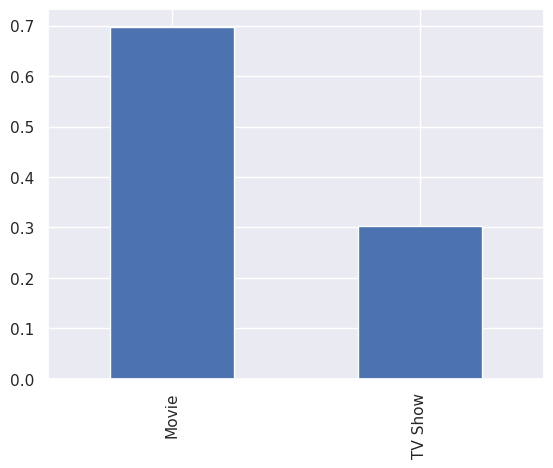

In [26]:
df['type'].value_counts(normalize=True).plot.bar()

* **Inference:**
* On Netflix  69% are Movie and 31% are TV Show

## Analysing 'director' feature

In [27]:
df['director'].nunique()

4524

In [28]:
df['director'].value_counts()

unknown                           2610
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Marcus Raboy                        16
Suhas Kadav                         16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4524, dtype: int64

**inference**
* Director "Rajiv Chilaka" has released highest number of shows.

## Analysing 'country' Feature

In [29]:
df['country'].nunique()

746

In [30]:
# Top 3 countries based on count on shows
df['country'].value_counts(normalize=True)[:3]

United states    0.319394
India            0.110757
Unknown          0.094462
Name: country, dtype: float64

<Axes: >

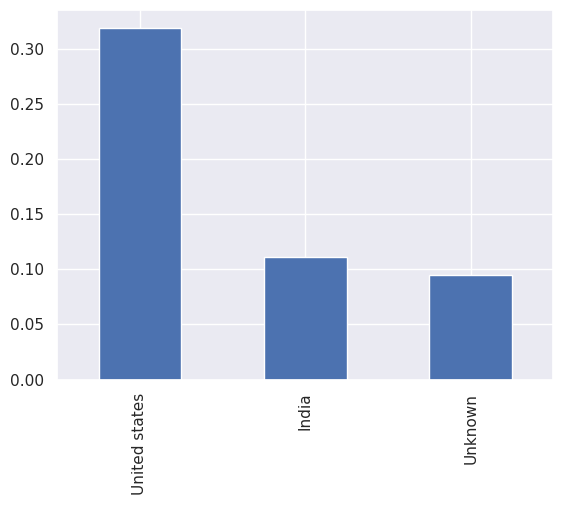

In [31]:
df['country'].value_counts(normalize=True)[:3].plot.bar()

**Inference**
* On Netflix most of the shows are from USA(31%) and India(11%)

## Analysing 'date_added_year' feature


<Axes: xlabel='added_year', ylabel='Density'>

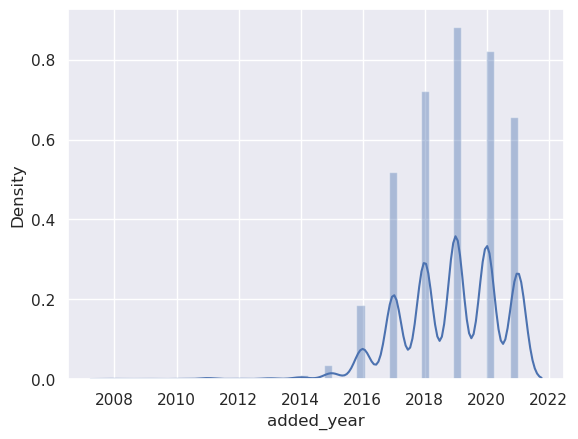

In [32]:
sns.distplot(df['added_year'])

<Axes: xlabel='added_year', ylabel='count'>

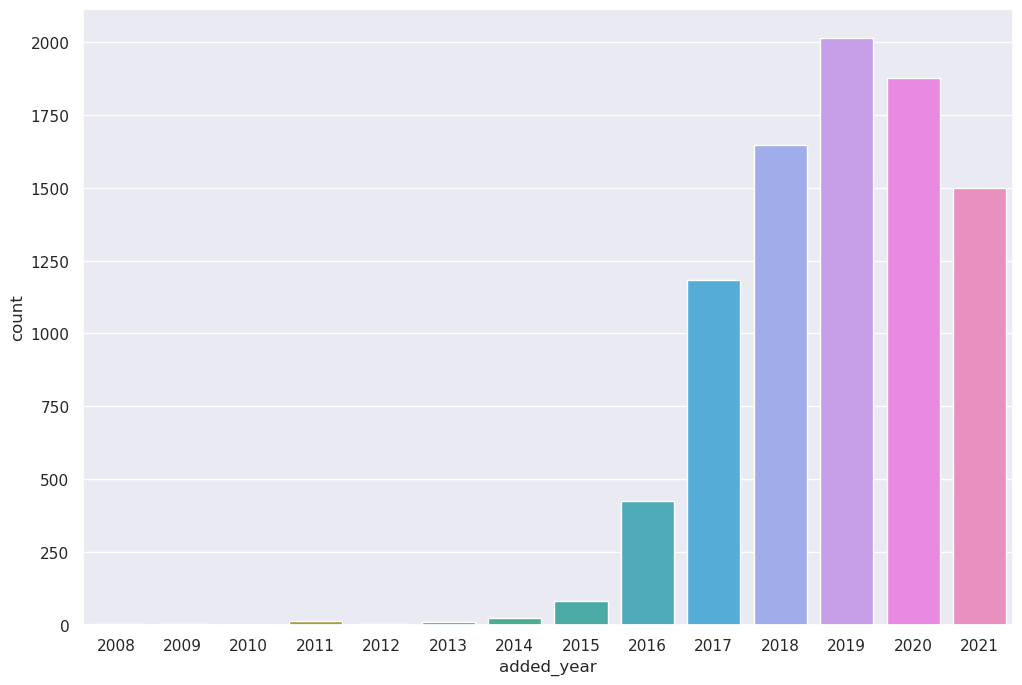

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(x = df['added_year'])

* **Inference**:
* Highest number of shows added was in 2019.

<Axes: >

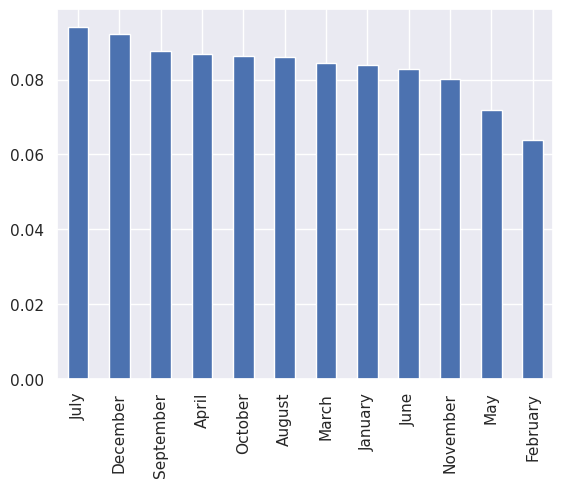

In [34]:
df['added_month'].value_counts(normalize=True).plot.bar()

** Inference**
* 'July,December,September' are the months in which most of the shows are released.

## Analysing 'rating' feature

In [35]:
df.rating.nunique()

14

<Axes: >

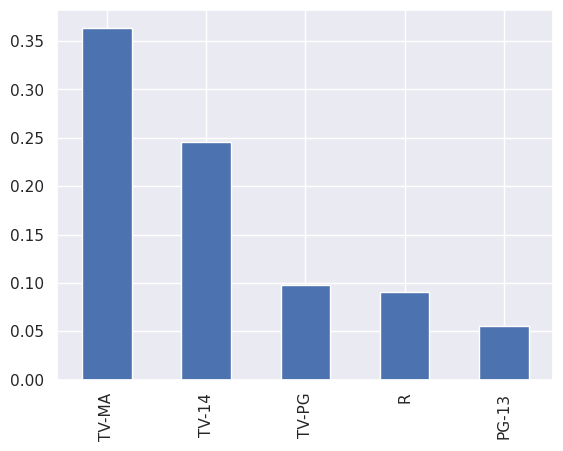

In [36]:
df.rating.value_counts(normalize=True)[:5].plot.bar()

**Inference**
* Most of the movies have got rating 'TV-MA,TV-14,TV-PG'.

In [37]:
# Analysing 'listed_in' feature
genre_list = df['listed_in'].str.split(',')

In [38]:
df['genre_1'] = genre_list.str.get(0)
df['genre_2'] = genre_list.str.get(1)
df['genre_3'] = genre_list.str.get(2)


In [39]:
# droping column 'listed_in'
df.drop('listed_in',axis =1,inplace =True)

In [40]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,description,added_month,added_year,genre_1,genre_2,genre_3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United states,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",September,2021,Documentaries,NaN,NaN
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South africa,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September,2021,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,September,2021,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,Unknown,2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",September,2021,Docuseries,Reality TV,NaN
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,September,2021,International TV Shows,Romantic TV Shows,TV Comedies


<Axes: >

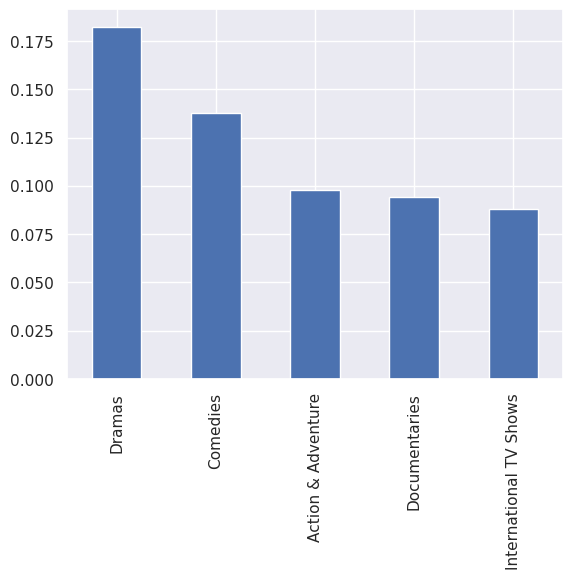

In [41]:
df['genre_1'].value_counts(normalize=True)[:5].plot.bar()

**Inference**
* Netflix has highest (i.e.17% ) shows of 'Drama' genre,followed by 'Comedies' genre.

In [42]:
df

,show_id,type,title,director,cast,country,release_year,rating,duration,description,added_month,added_year,genre_1,genre_2,genre_3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United states,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",September,2021,Documentaries,NaN,NaN
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South africa,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September,2021,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,September,2021,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,Unknown,2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",September,2021,Docuseries,Reality TV,NaN
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,September,2021,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United states,2007,R,158 min,"A political cartoonist, a crime reporter and a...",November,2019,Cult Movies,Dramas,Thrillers
8803,s8804,TV Show,Zombie Dumb,unknown,unknown,Unknown,2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g...",July,2019,Kids' TV,Korean TV Shows,TV Comedies
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United states,2009,R,88 min,Looking to survive in a world taken over by zo...,November,2019,Comedies,Horror Movies,NaN
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United states,2006,PG,88 min,"Dragged from civilian life, a former superhero...",January,2020,Children & Family Movies,Comedies,NaN


## Analysing dateMonth_added Colunm

<a id = 'bivariate Analysis'></a>
# Bivariate Analysis

In [43]:
temp_df = df[df['country'].isin(df['country'].value_counts()[:5].index)]

<Axes: xlabel='country', ylabel='count'>

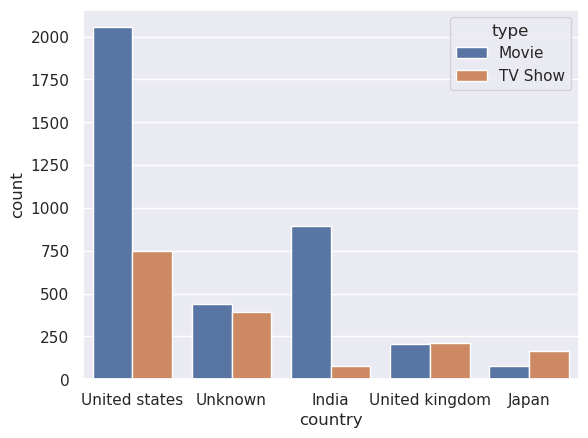

In [44]:
sns.countplot(data=temp_df,x='country',hue='type')

**Inference:**
* In USA and India 'Movie' show are more famous than 'TV Shows',and in United Kingdom both type are equily popular,and In Japan 'TV shows' are more popular than 'Movie' shows.

In [45]:
list(df['country'].value_counts()[:5].index)

['United states', 'India', 'Unknown', 'United kingdom', 'Japan']

<Axes: xlabel='country', ylabel='count'>

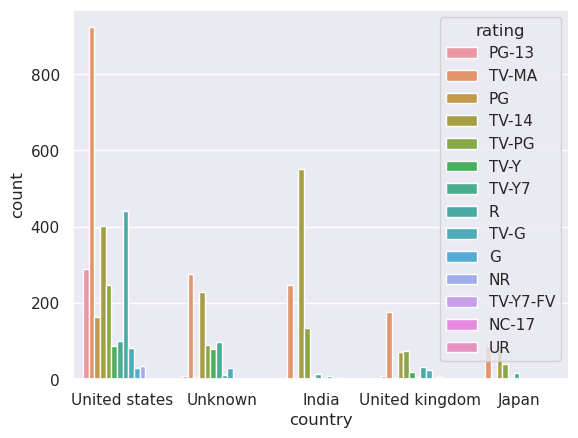

In [46]:
sns.countplot(data=temp_df,x='country',hue='rating')

**Inference**:
* for United states most of the shows have 'TV-MA' rating and in India most of the shows have 'TV-14' rating.

<Axes: xlabel='country', ylabel='count'>

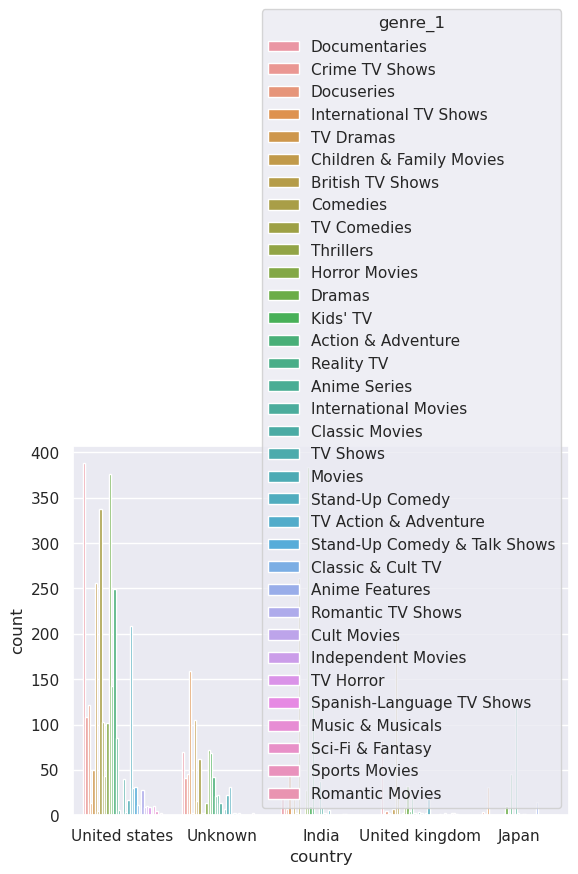

In [47]:
sns.countplot(data=temp_df,x='country',hue='genre_1')

<a id ='summary'></a>
# Summary
* On Netflix 69% are Movie and 31% are TV Show
* Director "Rajiv Chilaka" has released highest number of shows.
* On Netflix most of the shows are from USA(31%) and India(11%).
* Highest number of shows added was in 2019.
* 'July,December,September' are the months in which most of the shows are released.
* Most of the shows  are of  rating 'TV-MA,TV-14,TV-PG'.
* Netflix has highest (i.e.17% ) shows of 'Drama' genre,followed by 'Comedies' genre.
* In USA and India 'Movie' show are more famous than 'TV Shows',and in United Kingdom both type are equily popular,and In Japan 'TV shows' are more popular than 'Movie' shows.
* for United states most of the shows have 'TV-MA' rating and in India most of the shows have 'TV-14' rating.